# 関数一覧  

---

### ターミナルからの入力を受け取る  

`sys`モジュール `argv()`関数

```python
import sys

inputfile1 = sys.argv[1]
inputfile2 = sys.argv[2]
```
<br>

ターミナルからの入力をリストとして出力  
最初の要素sys.argv[0]は実行ファイル  

---

### pythonでターミナルのコマンドを実行する

`subprocess`モジュール `run()`関数  

```python
import subprocess
subprocess.run(['mkdir', 'new_dir'])
```
<br>

実行するコマンドはリスト形式で与える。

`shell=True`を使うと、文字列でコマンドを与えることができる。変数も使用可。  

```python
import subprocess
subprocess.run('mkdir new_dir', shell=True)
```

---

### ファイルパスを取得する

`glob`モジュール `glob()`関数  

```python
import glob
filelist = glob.glob('directory/*.txt')
```
<br>

リストとして取得できる。  
`glob()`では、ワイルドカードは`*`を使う。  
正規表現とは異なるので注意。  

---



### 多重比較補正  

`statsmodels`ライブラリの`multipletests`を使用する。  
[statsmodels リンク](https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html)


In [1]:
import statsmodels.stats.multitest as multi

pvalues = [0.1, 0.3, 0.5, 0.4, 0.1, 0.01, 0.05, 0.9, 0.4, 0.3]
qvalues = multi.multipletests(pvalues, alpha = 0.05, method = 'fdr_bh', is_sorted = False)[1].tolist()
for i in range(len(qvalues)):
    print(pvalues[i], qvalues[i], sep = '\t')

0.1	0.25
0.3	0.5
0.5	0.5555555555555556
0.4	0.5
0.1	0.25
0.01	0.09999999999999999
0.05	0.25
0.9	0.9
0.4	0.5
0.3	0.5


戻り値はtupleで、インデックス[0]はTure or False、[1]は補正されたp-value。  
要素のタイプはnumpy.ndarray。  
ここでは`tolist()`でリストに変換している。  
<br>
インプットするp値がソートされていない場合は、`is_sorted = False`を指定する。  
昇順にソートされている場合は、`is_sorted = True`を指定する。

In [2]:
pvalues = [0.1, 0.3, 0.5, 0.4, 0.1, 0.01, 0.05, 0.9, 0.4, 0.3]
pvalues_sorted = sorted(pvalues)
qvalues = multi.multipletests(pvalues_sorted, alpha = 0.05, method = 'fdr_bh', is_sorted = True)[1].tolist()
for i in range(len(qvalues)):
    print(pvalues[i], qvalues[i], sep = '\t')

0.1	0.09999999999999999
0.3	0.25
0.5	0.25
0.4	0.25
0.1	0.5
0.01	0.5
0.05	0.5
0.9	0.5
0.4	0.5555555555555556
0.3	0.9


`method = 'fdr_bh'` Benjamini/Hochberg  
`method = 'bonferroni'`　ボンフェローニ  

---

### ヒートマップの作成  

`seaborn`の`clustermap`を使用する。  
[clustermap リンク](https://seaborn.pydata.org/generated/seaborn.clustermap.html)  
<br>
ここでは例として`sklearn`のIrisのデータを使用する。

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


<Figure size 432x288 with 0 Axes>

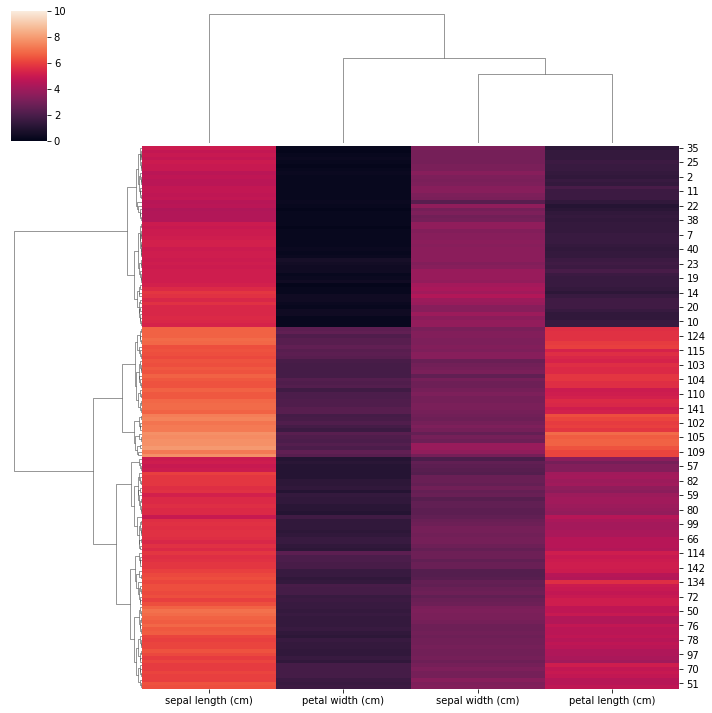

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure()
sns.clustermap(df, method='ward', vmin = 0, vmax = 10)
plt.show()

<Figure size 432x288 with 0 Axes>

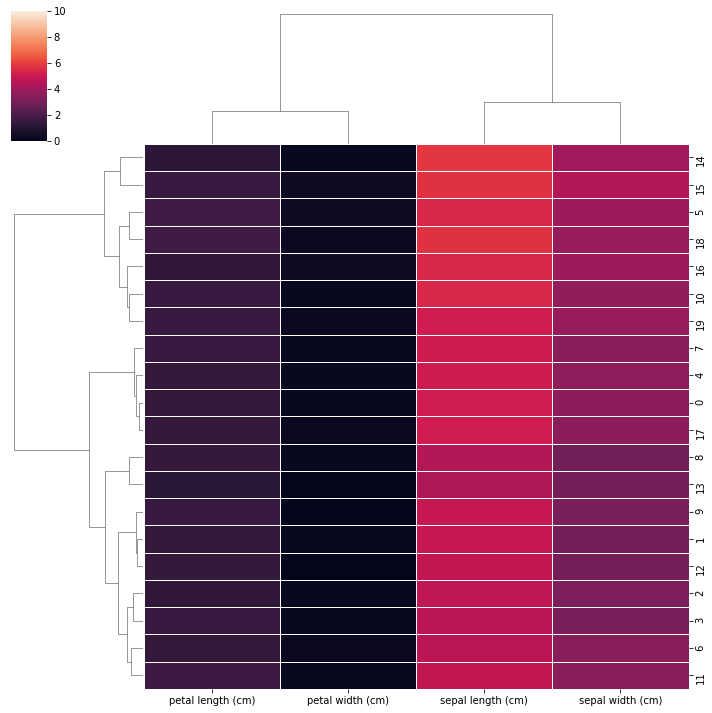

In [5]:
plt.figure()
sns.clustermap(df[:20], method='ward', vmin = 0, vmax = 10, linewidth = 0.5)
plt.show()

<br>

`matplotlib.colors.LinearSegmentedColormap.from_list`でヒートマップの色を指定する。  
[matplotlib.colors.LinearSegmentedColormap リンク](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.LinearSegmentedColormap.html#matplotlib.colors.LinearSegmentedColormap)

<Figure size 432x288 with 0 Axes>

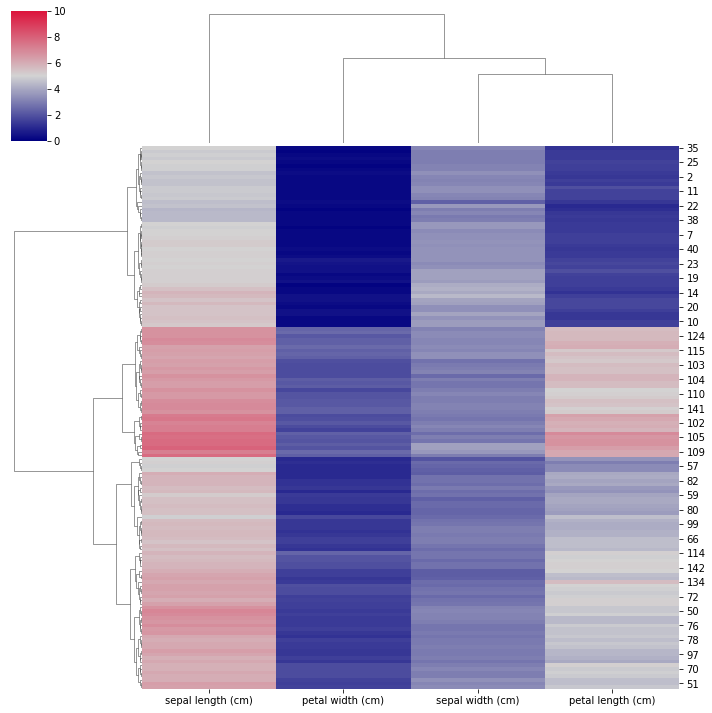

In [6]:
import matplotlib as mpl

colormap = mpl.colors.LinearSegmentedColormap.from_list('colormap_test',['navy','lightgray','crimson'])
plt.figure()
sns.clustermap(df, method='ward', cmap = colormap, vmin = 0, vmax = 10)
plt.show()

---



### jitter plot  

`seaborn`の`stripplot`を使用する。  

In [7]:
import pandas as pd
from sklearn.datasets import load_boston
dia = load_boston()
print(dia.keys())
print(dia['DESCR'])
df = pd.DataFrame(dia['data'], columns = dia['feature_names'])
print(df)
#df = pd.DataFrame(iris.data, columns = iris.feature_names)
#df['target'] = iris.target #品種情報も追加
#print(df)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highway

/Users/kt_imacpro/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

print(df.columns[1])
plt.figure()
sns.stripplot(x = 'target', y = df.columns[2], data = df, jitter = 0.2)
plt.show()

ZN


ValueError: Could not interpret input 'target'

<Figure size 432x288 with 0 Axes>